# Import Libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set
%matplotlib inline

# Read raw data and clean

### Read data

In [84]:
df_raw = pd.read_csv("data/booking_01_2017-06_2023_ed.csv")

In [85]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               277 non-null    object 
 1   Type               277 non-null    object 
 2   Confirmation Code  148 non-null    object 
 3   Start Date         148 non-null    object 
 4   Nights             148 non-null    float64
 5   Currency           277 non-null    object 
 6   Amount             149 non-null    float64
 7   Paid Out           128 non-null    float64
 8   Host Fee           130 non-null    float64
 9   Cleaning Fee       130 non-null    float64
 10  Earnings Year      149 non-null    float64
dtypes: float64(6), object(5)
memory usage: 23.9+ KB


In [86]:
df_raw.head()

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
0,01/30/2023,Payout,NaN,NaN,NaN,PHP,NaN,16714.07,NaN,NaN,NaN
1,01/30/2023,Reservation,HMQ2TSTFTP,01/29/2023,13.0,PHP,16714.07,NaN,516.93,500.0,2023.0
2,01/25/2023,Payout,NaN,NaN,NaN,PHP,NaN,6532.95,NaN,NaN,NaN
3,01/25/2023,Reservation,HMCRYM5SMM,01/24/2023,5.0,PHP,6532.95,NaN,202.05,300.0,2023.0
4,01/22/2023,Payout,NaN,NaN,NaN,PHP,NaN,3207.79,NaN,NaN,NaN


In [87]:
df_raw.tail()

,Date,Type,Confirmation Code,Start Date,Nights,Currency,Amount,Paid Out,Host Fee,Cleaning Fee,Earnings Year
272,11/19/2019,Reservation,HMAETZQNXP,11/18/2019,2.0,PHP,2667.50,NaN,82.50,350.0,2019.0
273,11/17/2019,Payout,NaN,NaN,NaN,PHP,NaN,2452.16,NaN,NaN,NaN
274,11/17/2019,Reservation,HMAQF2F2SD,11/16/2019,2.0,PHP,2452.16,NaN,75.84,350.0,2019.0
275,11/15/2019,Payout,NaN,NaN,NaN,PHP,NaN,2138.27,NaN,NaN,NaN
276,11/15/2019,Reservation,HMABYEKREN,11/14/2019,2.0,PHP,2138.27,NaN,66.13,350.0,2019.0


In [88]:
# Convert variable to datetime
df_raw['Date'] = pd.to_datetime(df_raw['Date'])

In [89]:
# Sort DataFrame by 'Date' in descending order
df_sorted = df_raw.sort_values('Date', ascending=False)


### Pivot and Merging Data

In [90]:
df_pivot = df_sorted.pivot(columns='Type', values='Amount')
df_pivot.reset_index(inplace=True)
df_pivot.info()
df_pivot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  277 non-null    int64  
 1   Adjustment             2 non-null      float64
 2   Misc Credit            1 non-null      float64
 3   Payout                 0 non-null      float64
 4   Reservation            128 non-null    float64
 5   Resolution Adjustment  2 non-null      float64
 6   Resolution Payout      16 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 15.3 KB


Type,index,Adjustment,Misc Credit,Payout,Reservation,Resolution Adjustment,Resolution Payout
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,16714.07,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,6532.95,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_sorted.columns
df_pivot.columns


Index(['index', 'Adjustment', 'Misc Credit', 'Payout', 'Reservation',
       'Resolution Adjustment', 'Resolution Payout'],
      dtype='object', name='Type')

In [92]:
df_merged = df_sorted.merge(df_pivot, left_index=True, right_on='index')
df_merged.drop('index', inplace=True, axis=1)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 276
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   277 non-null    datetime64[ns]
 1   Type                   277 non-null    object        
 2   Confirmation Code      148 non-null    object        
 3   Start Date             148 non-null    object        
 4   Nights                 148 non-null    float64       
 5   Currency               277 non-null    object        
 6   Amount                 149 non-null    float64       
 7   Paid Out               128 non-null    float64       
 8   Host Fee               130 non-null    float64       
 9   Cleaning Fee           130 non-null    float64       
 10  Earnings Year          149 non-null    float64       
 11  Adjustment             2 non-null      float64       
 12  Misc Credit            1 non-null      float64       
 13  Payou

### Numeric Dataframe

In [93]:
numeric_subset_o = df_merged[['Nights', 'Amount', 'Host Fee', 'Cleaning Fee']]

numeric_subset = df_merged.select_dtypes(include=['number'])
numeric_subset.drop(['Earnings Year', 'Payout'], axis=1, inplace=True)
numeric_subset

,Nights,Amount,Paid Out,Host Fee,Cleaning Fee,Adjustment,Misc Credit,Reservation,Resolution Adjustment,Resolution Payout
0,NaN,NaN,16714.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,16714.07,NaN,516.93,500.0,NaN,NaN,16714.07,NaN,NaN
2,NaN,NaN,6532.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,6532.95,NaN,202.05,300.0,NaN,NaN,6532.95,NaN,NaN
4,NaN,NaN,3207.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
272,2.0,2667.50,NaN,82.50,350.0,NaN,NaN,2667.50,NaN,NaN
273,NaN,NaN,2452.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,2.0,2452.16,NaN,75.84,350.0,NaN,NaN,2452.16,NaN,NaN
275,NaN,NaN,2138.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Correlation

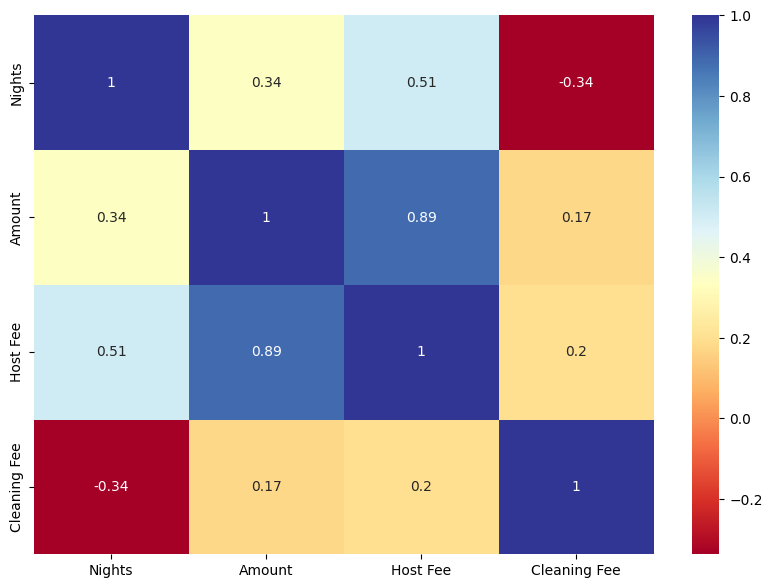

In [94]:
# We can see strong correlation between Host Fee and Amount. So the higher the amount, the higher the host fee is.
# We won't run correlation on Type due to a lot of null values.
num_o_corr = numeric_subset_o.corr()
plt.figure(figsize = (10,7))
sns.heatmap(num_o_corr, annot=True, cmap='RdYlBu')
plt.show()

#### Boxplot of Numeric Data

In [95]:
numeric_subset.head()

,Nights,Amount,Paid Out,Host Fee,Cleaning Fee,Adjustment,Misc Credit,Reservation,Resolution Adjustment,Resolution Payout
0,NaN,NaN,16714.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,16714.07,NaN,516.93,500.0,NaN,NaN,16714.07,NaN,NaN
2,NaN,NaN,6532.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,6532.95,NaN,202.05,300.0,NaN,NaN,6532.95,NaN,NaN
4,NaN,NaN,3207.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
amount_vars = ['Amount','Adjustment', 'Misc Credit', 'Adjustment', 'Resolution Payout', 'Resolution Adjustment']
selected_columns = ['Date', 'Type', 'Confirmation Code', 'Start Date', 'Nights']

subset_dict = {}

for var in amount_vars:
    subset = df_merged.loc[df_merged[var].notnull(), selected_columns + [var]]
    subset_dict[var] = subset

# Print the first few rows of each subset
for var, subset in subset_dict.items():
    print(f"Subset for {var}:")
    print(subset.info())
    print(subset.head())
    print()

Subset for Amount:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1 to 276
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               149 non-null    datetime64[ns]
 1   Type               149 non-null    object        
 2   Confirmation Code  148 non-null    object        
 3   Start Date         148 non-null    object        
 4   Nights             148 non-null    float64       
 5   Amount             149 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.1+ KB
None
        Date         Type Confirmation Code  Start Date  Nights    Amount
1 2023-01-30  Reservation        HMQ2TSTFTP  01/29/2023    13.0  16714.07
3 2023-01-25  Reservation        HMCRYM5SMM  01/24/2023     5.0   6532.95
5 2023-01-22  Reservation        HMB3WQ5P3B  01/21/2023     2.0   3207.79
7 2023-01-20  Reservation        HMF48393S4  01/19/2023     2.0  

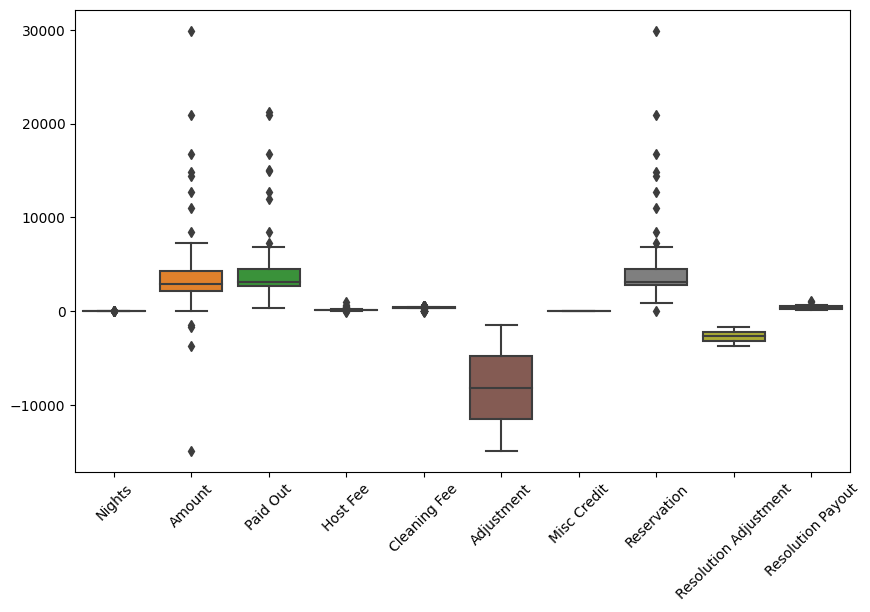

In [97]:
# Amount represents Adjustment, Misc Credit, Reservation, Resolution Adjustment, Resolution Payout
plt.figure(figsize=(10,6))
sns.boxplot(numeric_subset)
plt.xticks(rotation=45)
plt.show()

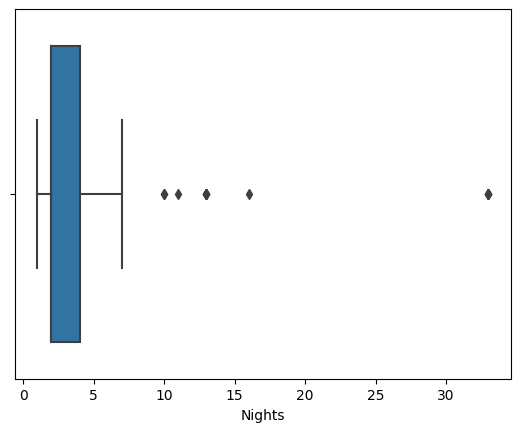

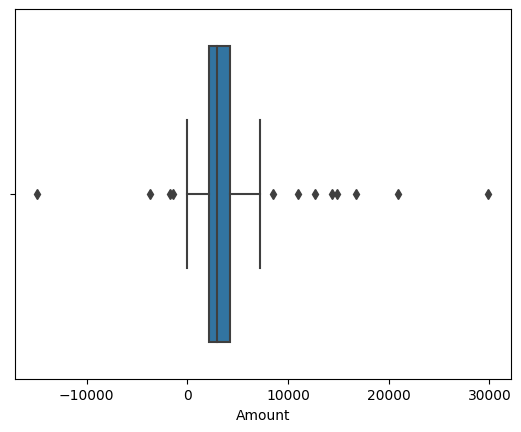

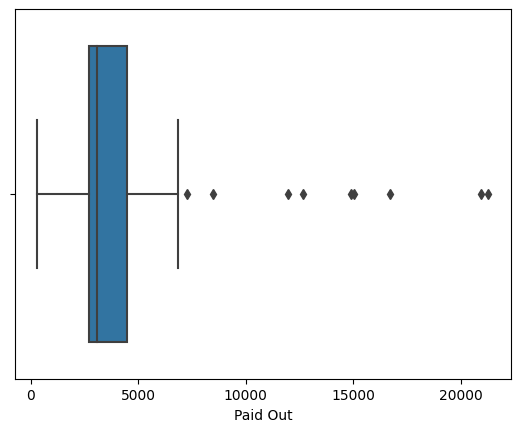

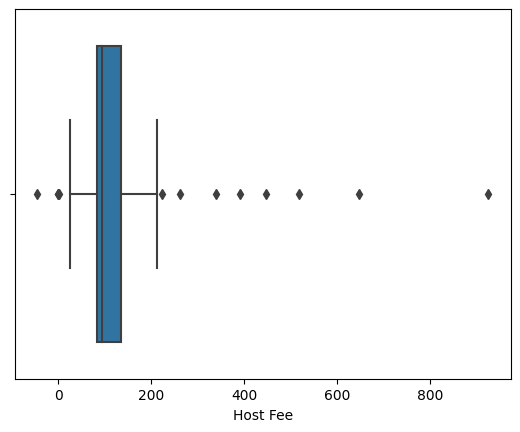

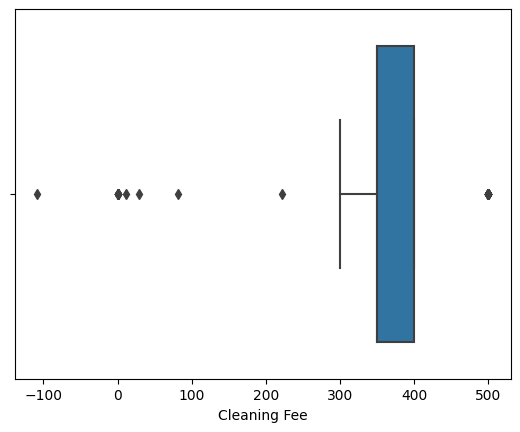

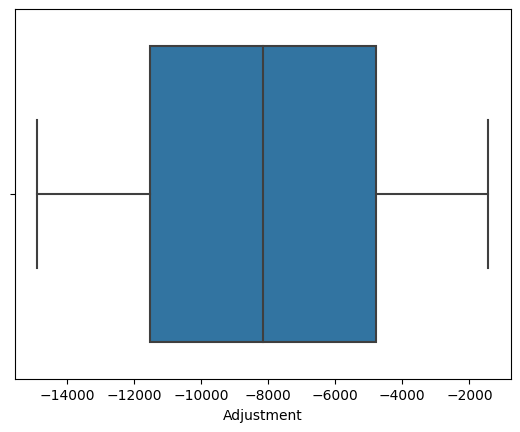

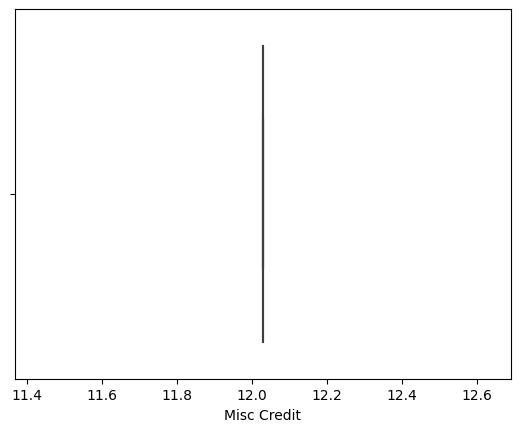

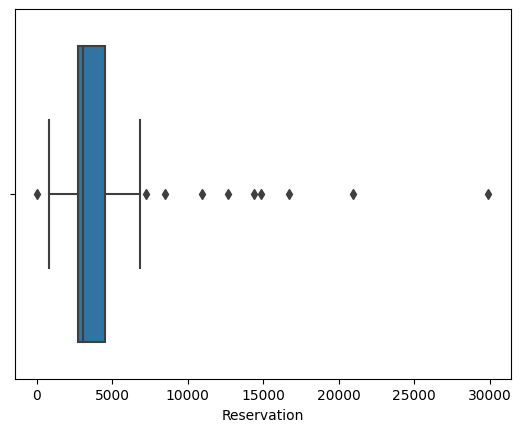

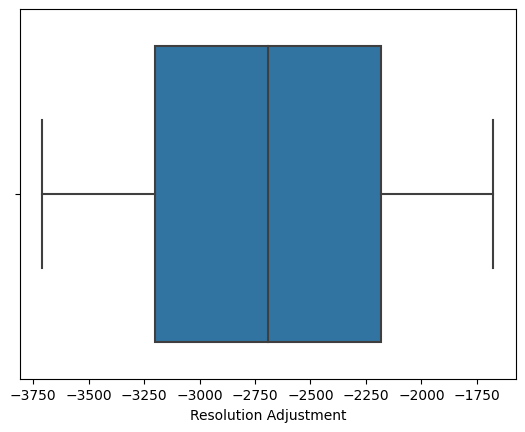

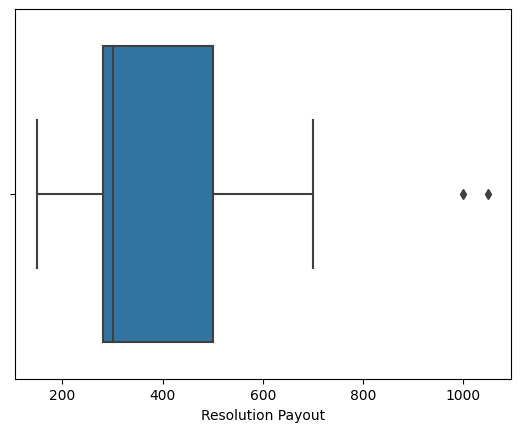

In [98]:
for column in numeric_subset.iloc[:, :].columns:
  plt.figure()
  sns.boxplot(x = numeric_subset[column])



#### Histogram of Numeric Data

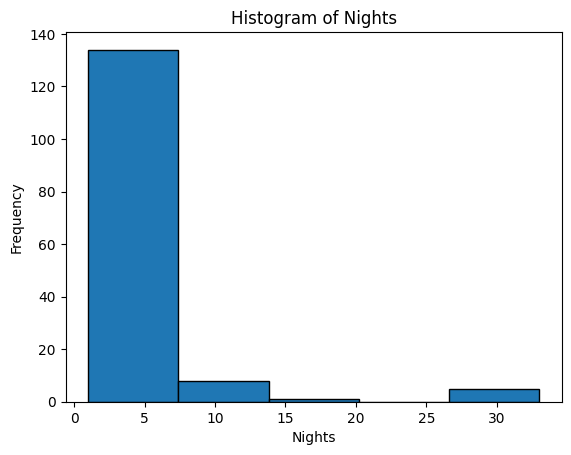

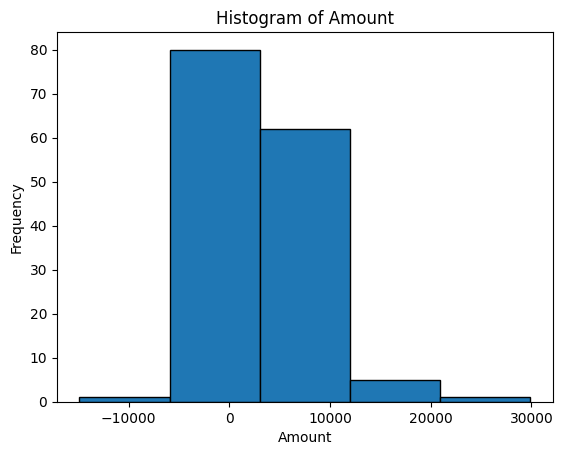

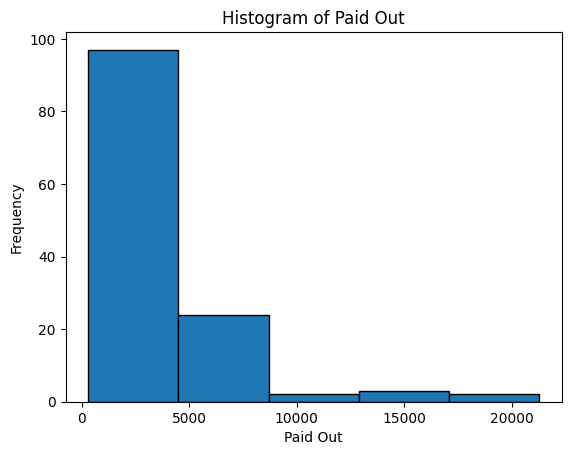

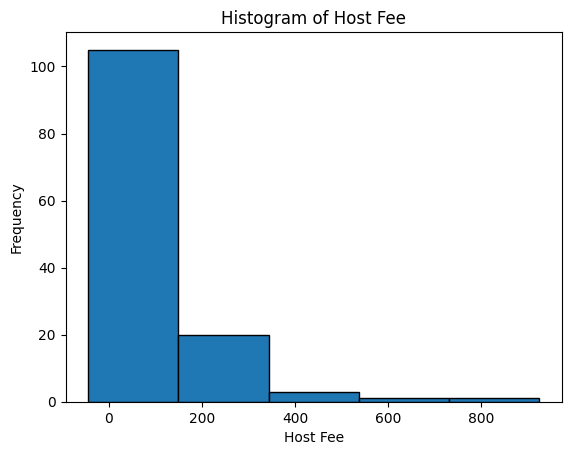

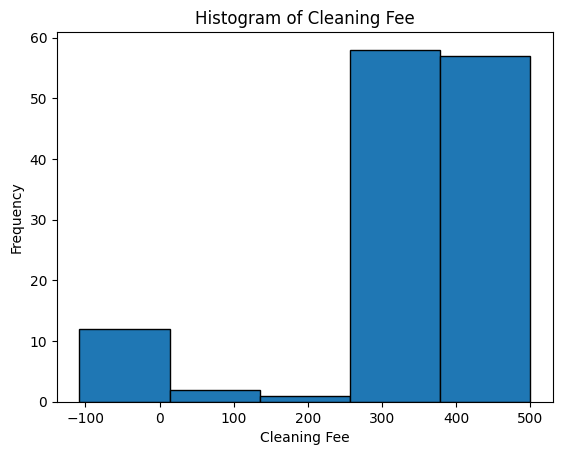

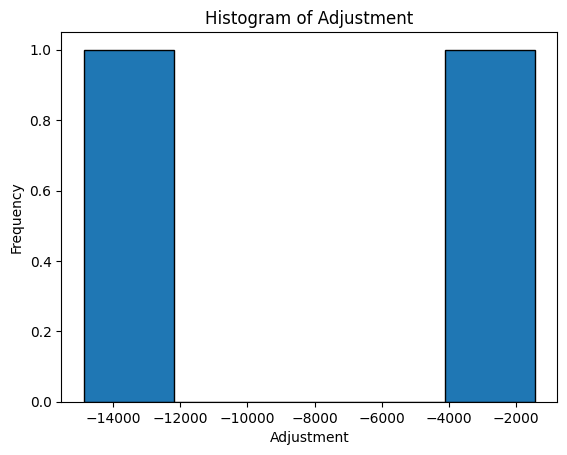

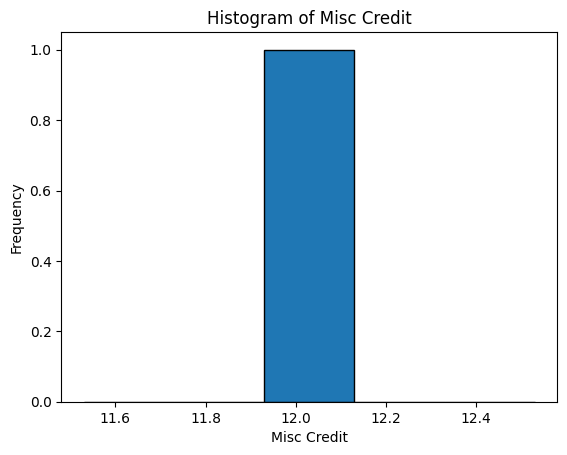

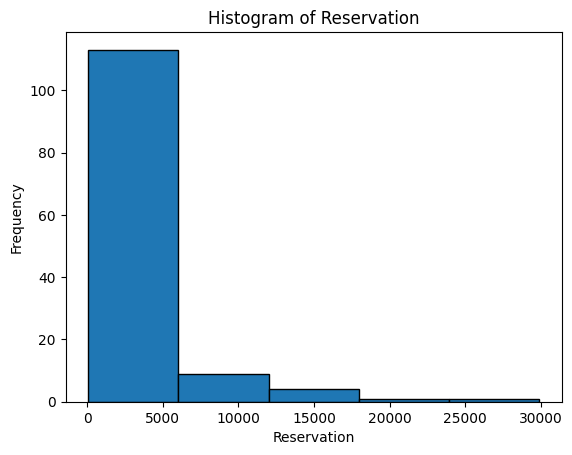

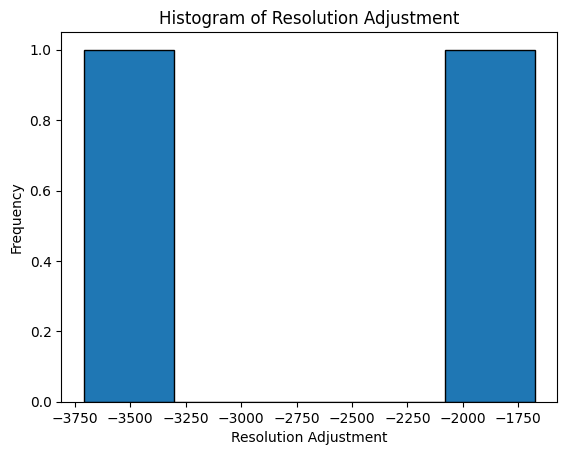

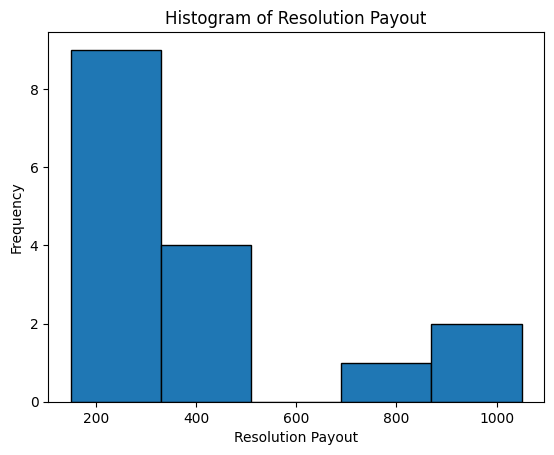

In [99]:
for column in numeric_subset.columns:
    plt.figure()
    plt.hist(numeric_subset[column], bins=5, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

#### Scatterplot

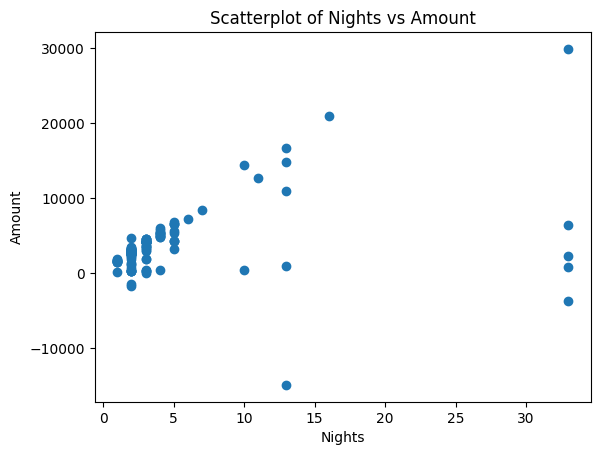

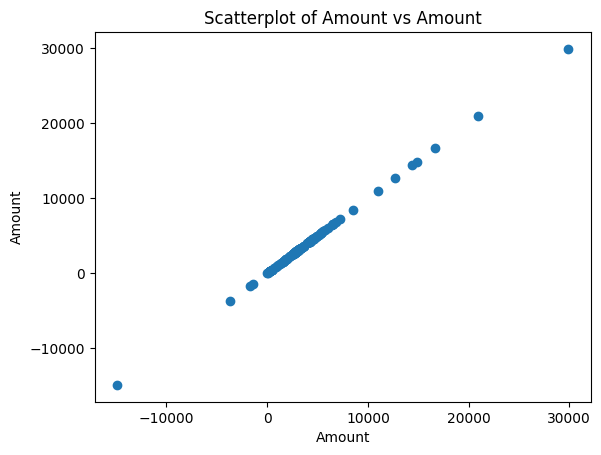

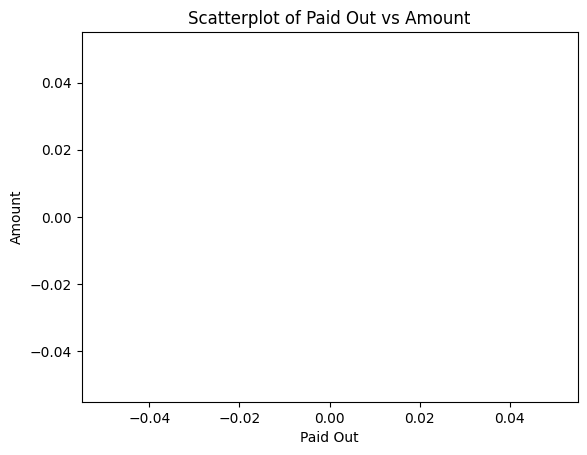

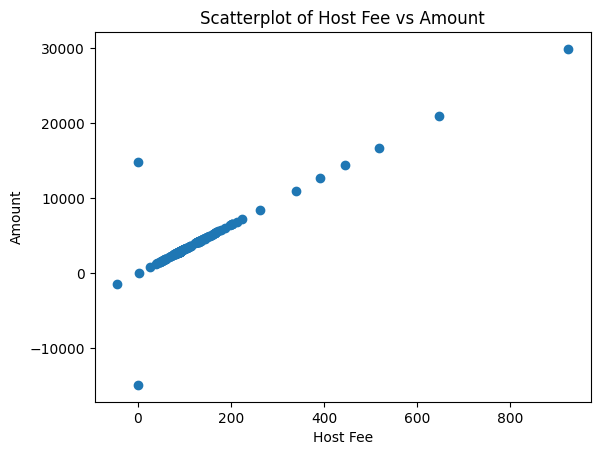

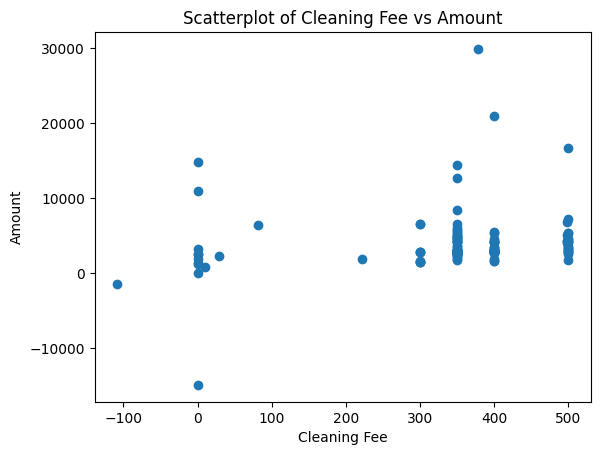

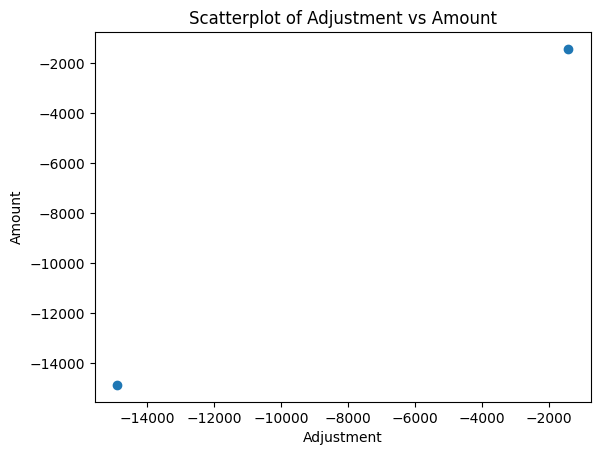

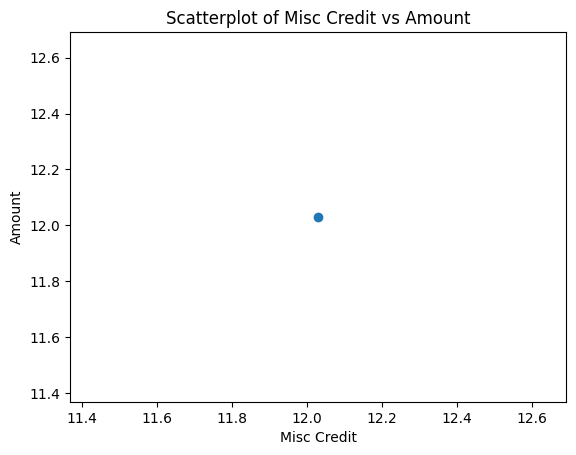

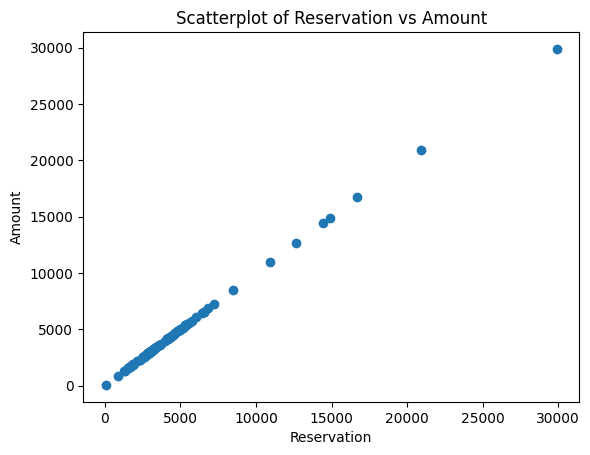

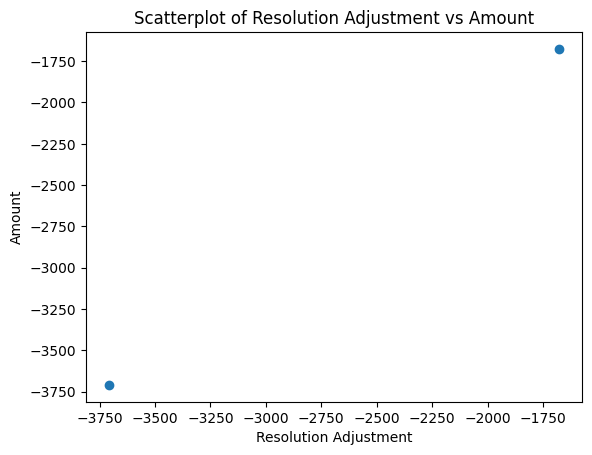

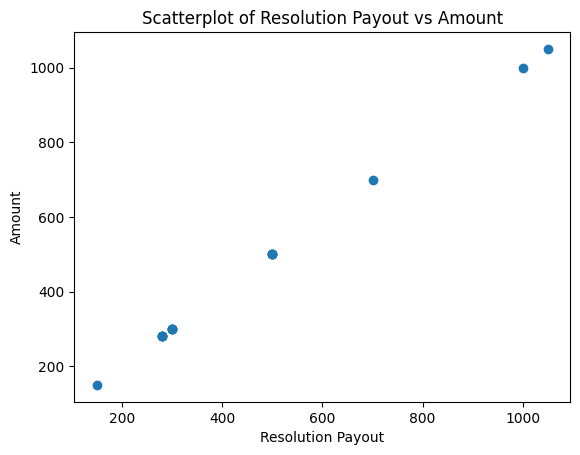

In [100]:
# Scatterplot
# We can see positive correlation on Nights and Amount, except that there are some outliers
# Positive correlation on Host Fee and Amount. Investigate 0 Host Fee on the outliers
# Positive correlation on Resolution Payout and Amount

for column in numeric_subset.columns:
    plt.figure()
    plt.scatter(numeric_subset[column], numeric_subset['Amount'])
    plt.xlabel(column)
    plt.ylabel('Amount')
    plt.title(f'Scatterplot of {column} vs Amount')
    plt.show()

# Overall Earnings

In [101]:
# Paid Out

total_paidOut = round(df_sorted['Paid Out'].sum(), 2)
total_paidOut

527069.82

In [102]:
# Host Fee

total_hostFee = round(df_sorted['Host Fee'].sum(), 2)

In [103]:
# Cleaning Fee

total_cleanFee = round(df_sorted['Cleaning Fee'].sum(), 2)
total_cleanFee

45258.45

In [104]:
# Total Earning without Clean Fee

total_earningWCF = round(total_paidOut - total_cleanFee, 2)
total_earningWCF

481811.37

In [105]:
# Change 'Earnings Year' var from float to integer but ignore NaN values
df_sorted['Earnings Year'] = df_sorted['Earnings Year'].fillna(df_sorted['Earnings Year']).astype(float).astype('Int64')
df_sorted['Earnings Year'].dtype


Int64Dtype()

# Amount & Payout

### Yearly Payout & Reservation

In [106]:
print("Total Payout", df_sorted['Type'].value_counts().get('Payout', 0))
print("Total Reservation", df_sorted['Type'].value_counts().get('Reservation', 0))



Total Payout 128
Total Reservation 128


In [107]:
# We cannot run this because Payout doesn't have 'Earnings Year' value

#df_2019 = df_sorted[df_sorted['Earnings Year'] == 2019 ]
#df_2020 = df_sorted[df_sorted['Earnings Year'] == 2020 ]
#df_2021 = df_sorted[df_sorted['Earnings Year'] == 2021 ]
#df_2022 = df_sorted[df_sorted['Earnings Year'] == 2022 ]
#df_2023 = df_sorted[df_sorted['Earnings Year'] == 2023 ]

# Categorize based on Date variable

df_2019 = df_sorted[df_sorted['Date'] <= '2019-12-31']
df_2020 = df_sorted[(df_sorted['Date'] >= '2020-01-01') & (df_sorted['Date'] <= '2020-12-31')]
df_2021 = df_sorted[(df_sorted['Date'] >= '2021-01-01') & (df_sorted['Date'] <= '2021-12-31')]
df_2022 = df_sorted[(df_sorted['Date'] >= '2022-01-01') & (df_sorted['Date'] <= '2022-12-31')]
df_2023 = df_sorted[(df_sorted['Date'] >= '2023-01-01') & (df_sorted['Date'] <= '2023-12-31')]


In [108]:
# Create a dictionary to store the results
results = {}

# Define the years
years = df_sorted['Date'].dt.year.unique().tolist()

# Count the observations for each year and type
for year in years:
    df_year = globals()[f"df_{year}"]
    results[f"{year}_cnt_Payout"] = df_year['Type'].value_counts().get('Payout', 0)
    results[f"{year}_cnt_Reservation"] = df_year['Type'].value_counts().get('Reservation', 0)

# Print the results
for year, types in results.items():
    print(f"{year}: {types}")

2023_cnt_Payout: 10
2023_cnt_Reservation: 10
2022_cnt_Payout: 76
2022_cnt_Reservation: 75
2020_cnt_Payout: 30
2020_cnt_Reservation: 31
2019_cnt_Payout: 12
2019_cnt_Reservation: 12


In [109]:
print("Total Payout", df_sorted['Type'].value_counts()['Payout'])
print("Total Reservation", df_sorted['Type'].value_counts()['Reservation'])

Total Payout 128
Total Reservation 128


### Yearly Payout


In [110]:
round(df_sorted['Paid Out'].sum(), 2)

527069.82

In [111]:
# Sum Payout per year
results = {}

# Define the years
years = df_sorted['Date'].dt.year.unique().tolist()

for year in years:
  df_year = globals()[f"df_{year}"]
  results[f"{year}_sum_Payout"] = round(df_year['Paid Out'].sum(), 2)

# Print the results
for year, types in results.items():
    print(f"{year}: {types}")

2023_sum_Payout: 51374.41
2022_sum_Payout: 282957.22
2020_sum_Payout: 138204.92
2019_sum_Payout: 54533.27


### Amount

In [112]:
types = df_sorted['Type'].unique().tolist()
types

PaidOut_sum = round(df_sorted['Paid Out'].sum(), 2)
PaidOut_sum

527069.82

In [113]:
print(df_sorted.groupby('Type')['Amount'].sum())


Type
Adjustment               -16315.94
Misc Credit                  12.03
Payout                        0.00
Reservation              540921.24
Resolution Adjustment     -5385.15
Resolution Payout          7220.00
Name: Amount, dtype: float64


In [114]:
# There is expectation for this amount to be higher or lower than Total Payout due to adjustments
print('Total Amount:', df_sorted['Amount'].sum())

Total Amount: 526452.18


In [115]:
print("Total Paid Out: ", round(df_sorted['Paid Out'].sum(), 2))

Total Paid Out:  527069.82


In [116]:
tot_amt = df_sorted['Amount'].sum()
tot_pdOut = round(df_sorted['Paid Out'].sum(), 2)

if (tot_amt < tot_pdOut):
  tot_credit = round((tot_pdOut - tot_amt), 2)
  print(f"Total amount received is greater than the total amount (with adjustments) by Php{tot_credit}.")

Total amount received is greater than the total amount (with adjustments) by Php617.64.
